# Check rho-/tau-stats data and JK covariance data. 

In [11]:
import numpy as np

# statistics files
outpath = '/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v5b/rho_tau_stats/'
rho_stats = np.genfromtxt(outpath + 'rho_all_JK_riz.dat')
tau_stats = np.genfromtxt(outpath + 'tau_all_JK_riz.dat')

# covariance files
rho_cov = np.load(outpath + 'rho_multi_cov.npy')
tau_cov = np.load(outpath + 'tau_multi_cov.npy')

In [3]:
rho_stats.shape

(19, 40)

(480, 480) (240, 240)
40.0 40.0


Text(0.5, 1.0, '$\\tau$-stats. Covariance Matrix')

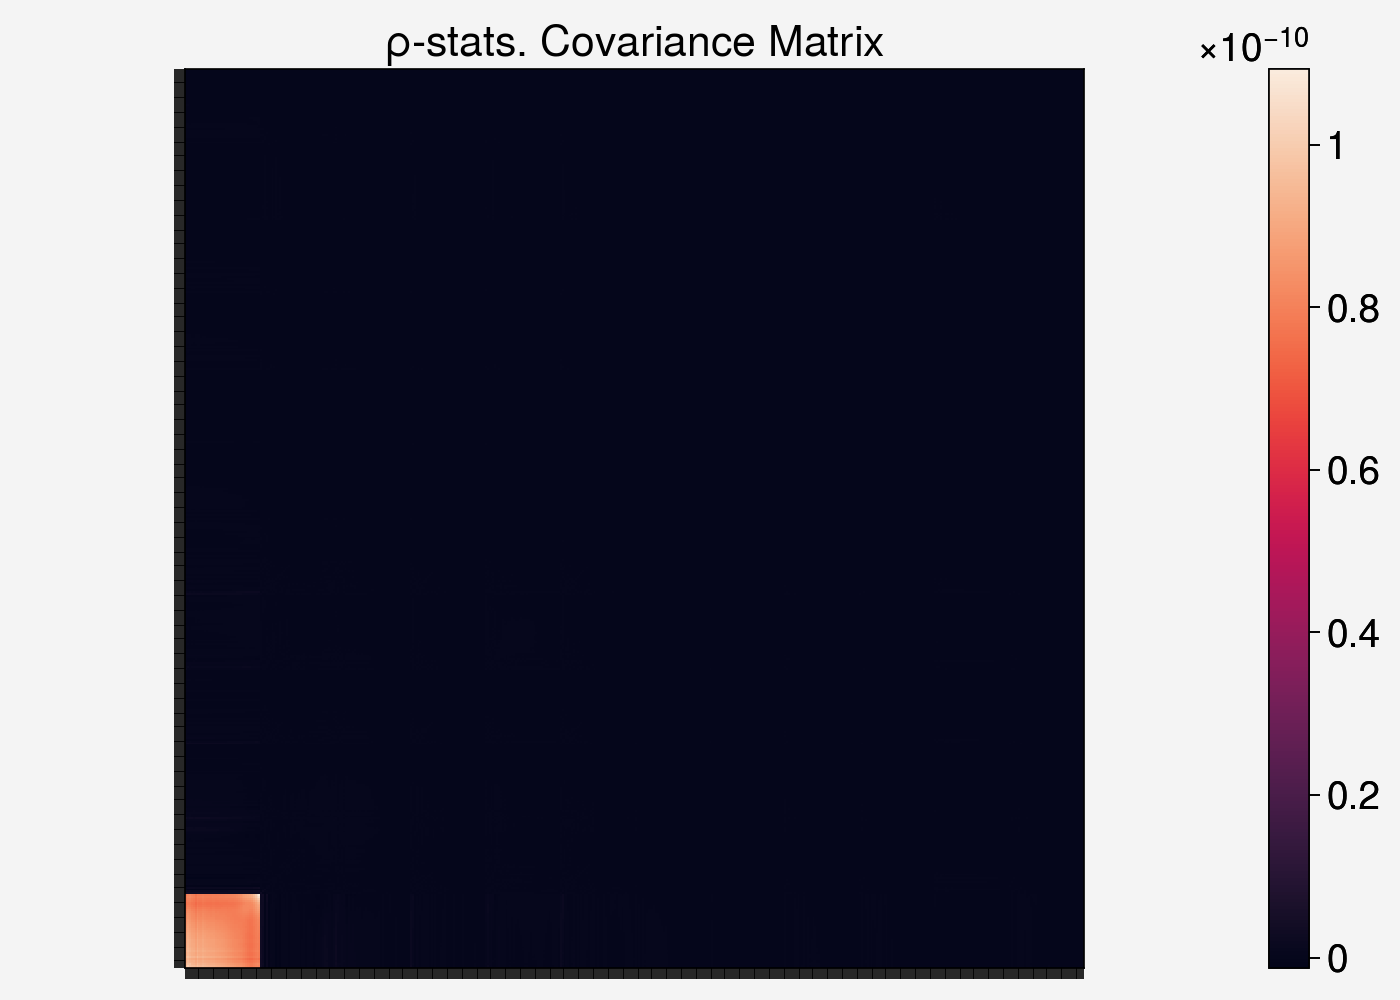

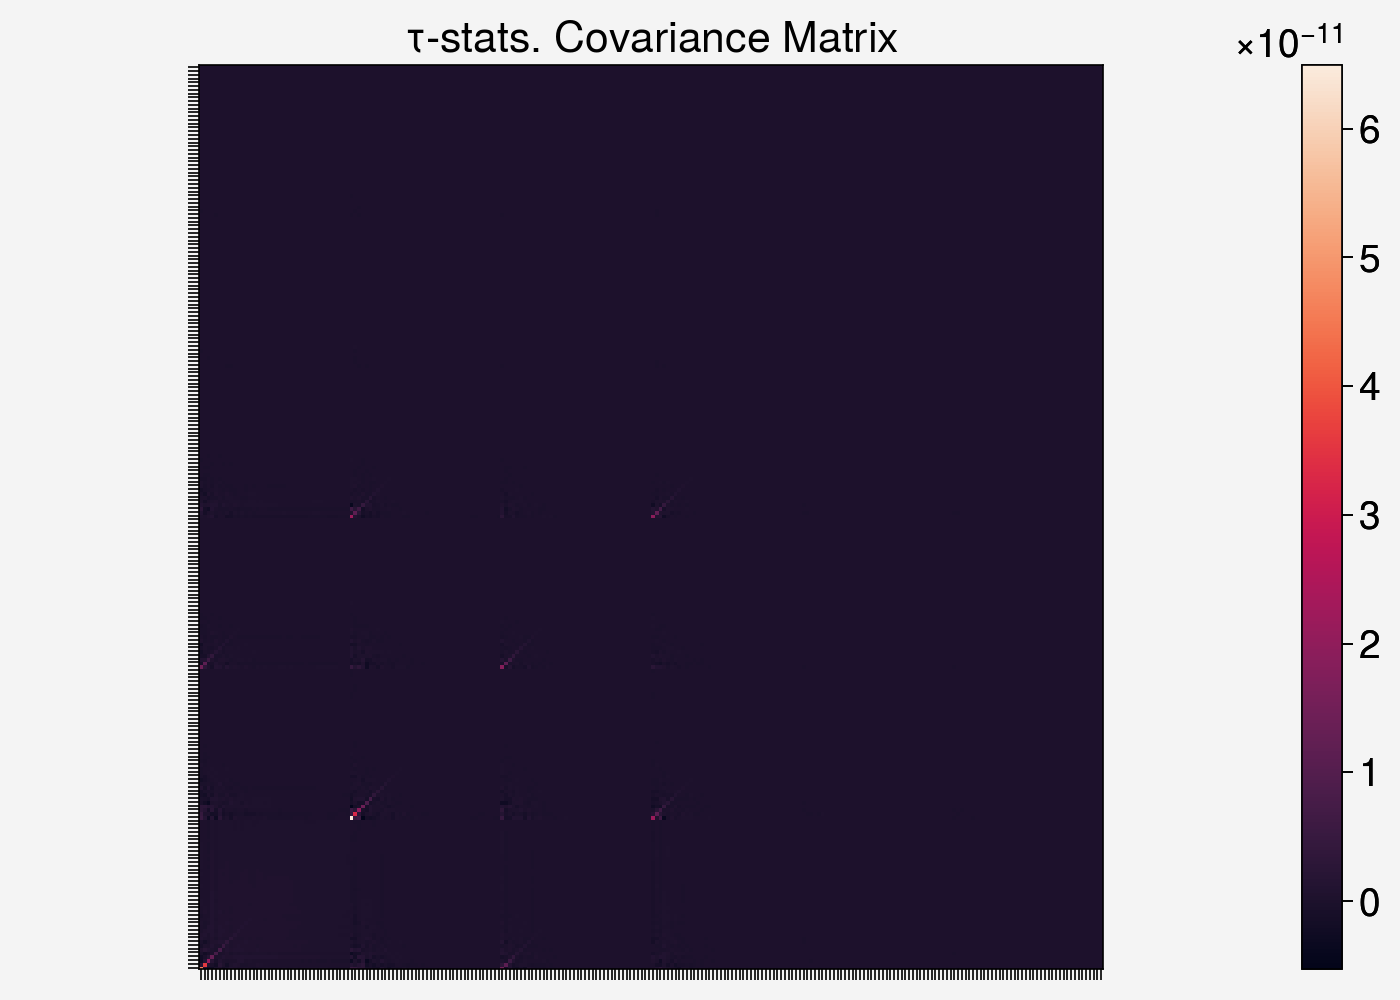

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import proplot as pplt
from matplotlib.colors import LogNorm, Normalize

print(rho_cov.shape, tau_cov.shape)
print(rho_cov.shape[0]/12, tau_cov.shape[0]/6) 

mpl.rcParams.update({'font.size':14})
fig = pplt.figure(figsize=(7,5))
ax = fig.subplots(nrows=1, ncols=1)

im = ax.heatmap(rho_cov, cmap='rocket')
ax.colorbar(im, loc='r')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(r'$\rho$-stats. Covariance Matrix')

mpl.rcParams.update({'font.size':14})
fig = pplt.figure(figsize=(7,5))
ax = fig.subplots(nrows=1, ncols=1)
im2 = ax.heatmap(tau_cov, cmap='rocket')
ax.colorbar(im2, loc='r')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(r'$\tau$-stats. Covariance Matrix')

In [27]:
# rho_stats: meanr(0), rho1p(1), rho1m(2), sig_rho1, rho2p(4), rho2m(5), sig_rho2, rho3p(7), rho3m(8), sig_rho3, rho4p(10), rho4m(11), sig_rho4, rho5p(13), rho5m(14), sig_rho5, rho0p(16), rho0m(17), sig_rho0
# tau_stats: meanr(0), tau0p(1), tau0m(2), sig_tau0(3), tau2p(4), tau2m(5), sig_tau2(6), tau5p(7), tau5m(8), sig_tau5(9)

# Make rho-/tau-files necessary to run alpha, beta, eta test from rho-/tau-statistics.

In [14]:
from astropy.io import fits
tau0parr = tau_stats[1]
tau2parr = tau_stats[4]
tau5parr = tau_stats[7]
tau0marr = tau_stats[2]
tau2marr = tau_stats[5]
tau5marr = tau_stats[8]
covmat = tau_cov  # insert here your covariance matrix. Must be ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M'] x ['TAU0P', 'TAU0M','TAU2P','TAU2M', 'TAU5P', 'TAU5M']
angarray = tau_stats[0] # include angular bins here

taus = [tau0parr, tau0marr, tau2parr, tau2marr, tau5parr, tau5marr]
taus_names = ['TAU0P', 'TAU0M', 'TAU2P', 'TAU2M', 'TAU5P', 'TAU5M']
##Format of the fit file output



names=['BIN1', 'BIN2', 'ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(tau0marr)
outdata = np.recarray((nrows, ), dtype=dtype)

hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)



for j, nam in enumerate(taus_names):
    outdata = np.recarray((nrows, ), dtype=dtype)
    array_list = [bin1array, bin2array, angbinarray,np.array(taus[j]),  angarray ]
    for array, name in zip(array_list, names): 
        outdata[name] = array

    corrhdu = fits.BinTableHDU(outdata, name=nam)
    hdul.insert(j+2, corrhdu)
    
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'TAU0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'TAU2'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'TAU5'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'

hdul.writeto(outpath + 'tau_JK_Y6_nontomographic.fits', overwrite=True)

print ("done")

done


In [15]:
entries=["rho0_p","rho0_m","rho1_p","rho1_m","rho2_p","rho2_m","rho3_p","rho3_m","rho4_p","rho4_m","rho5_p","rho5_m"]
rhos = [rho_stats[16], rho_stats[17], 
        rho_stats[1], rho_stats[2],
        rho_stats[4], rho_stats[5],
        rho_stats[7], rho_stats[8],
        rho_stats[10], rho_stats[11],
        rho_stats[13], rho_stats[14],] #include here your rhos rho0+,rho0-, ...
rhos_names = ['RHO0P', 'RHO0M','RHO1P','RHO1M','RHO2P','RHO2M','RHO3P','RHO3M', 'RHO4P','RHO4M', 'RHO5P', 'RHO5M']
covmat = rho_cov #this is the covariance of the rhos stats; it's not really used so you can put in whatever...
angarray = rho_stats[0] # include angular bins here


names=['BIN1', 'BIN2','ANGBIN', 'VALUE', 'ANG']
forms = ['i4', 'i4', 'i4',  'f4',  'f4']
dtype = dict(names = names, formats=forms)
nrows = len(rhos[0])
outdata = np.recarray((nrows, ), dtype=dtype)

hdu = fits.PrimaryHDU()
hdul = fits.HDUList([hdu])
covmathdu = fits.ImageHDU(covmat, name='COVMAT')
hdul.insert(1, covmathdu)
zbin=1
bin1array = np.array([ zbin]*nrows)
bin2array = np.array([ -999]*nrows)
angbinarray = np.arange(nrows)


for j, nam in enumerate(rhos_names):
    outdata = np.recarray((nrows, ), dtype=dtype)
    array_list = [bin1array, bin2array, angbinarray,np.array(rhos[j]),  angarray ]
    for array, name in zip(array_list, names): 
        outdata[name] = array

    corrhdu = fits.BinTableHDU(outdata, name=nam)
    hdul.insert(j+2, corrhdu)
    
hdul[1].header['COVDATA'] = True
hdul[1].header['EXTNAME'] =  'COVMAT'
hdul[1].header['NAME_0'] =  'RHO0'
hdul[1].header['STRT_0'] =  0
hdul[1].header['LEN_0'] = nrows
hdul[1].header['NAME_1'] =  'RHO1'
hdul[1].header['STRT_1'] =  nrows
hdul[1].header['LEN_1'] = nrows
hdul[1].header['NAME_2'] =  'RHO2'
hdul[1].header['STRT_2'] =  2*nrows
hdul[1].header['LEN_2'] = nrows
hdul[1].header['NAME_3'] =  'RHO3'
hdul[1].header['STRT_3'] =  3*nrows
hdul[1].header['LEN_3'] = nrows
hdul[1].header['NAME_4'] =  'RHO4'
hdul[1].header['STRT_4'] =  4*nrows
hdul[1].header['LEN_4'] = nrows
hdul[1].header['NAME_5'] =  'RHO5'
hdul[1].header['STRT_5'] =  5*nrows
hdul[1].header['LEN_5'] = nrows
hdul[2].header['QUANT1'] = 'GeR'; hdul[3].header['QUANT1'] = 'GeR'
hdul[2].header['QUANT2'] = 'PeR'; hdul[3].header['QUANT2'] = 'PeR'
hdul[4].header['QUANT1'] = 'GeR'; hdul[5].header['QUANT1'] = 'GeR'
hdul[4].header['QUANT2'] = 'PqR'; hdul[5].header['QUANT2'] = 'PqR'
hdul[6].header['QUANT1'] = 'GeR'; hdul[7].header['QUANT1'] = 'GeR'
hdul[6].header['QUANT2'] = 'PwR'; hdul[7].header['QUANT2'] = 'PwR'


    
hdul.writeto(outpath + 'rho_JK_Y6_nontomographic.fits', overwrite=True)

print ("done")

done


# Don't forget to change the hartlap correction part! 
https://darkenergysurvey.slack.com/archives/C038QRECCNP/p1648238255720499

# Run abe_test.py as following.

python abe_test.py --taus=/pscratch/sd/m/myamamot/metadetect/abe_test/tau_JK_v3_Y6_nontomographic.fits --rhos=/pscratch/sd/m/myamamot/metadetect/abe_test/rho_JK_v3_Y6_nontomographic.fits --outpath=/pscratch/sd/m/myamamot/metadetect/abe_test --plotspath=/pscratch/sd/m/myamamot/metadetect/abe_test --overall --nsteps=100 --nwalkers=20

# Check output @04/06/2023

In [6]:
import fitsio as fio

outpath1 = '/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v3/rho_tau_stats/'
rho1 = fio.read(outpath + 'rho_BOOT_Y6_nontomographic.fits')
tau1 = fio.read(outpath + 'tau_BOOT_Y6_nontomographic.fits')
outpath2 = '/pscratch/sd/m/myamamot/metadetect/abe_test/'
rho2 = fio.read(outpath2 + 'rho_JK_v3_Y6_nontomographic.fits')
tau2 = fio.read(outpath2 + 'tau_JK_v3_Y6_nontomographic.fits')

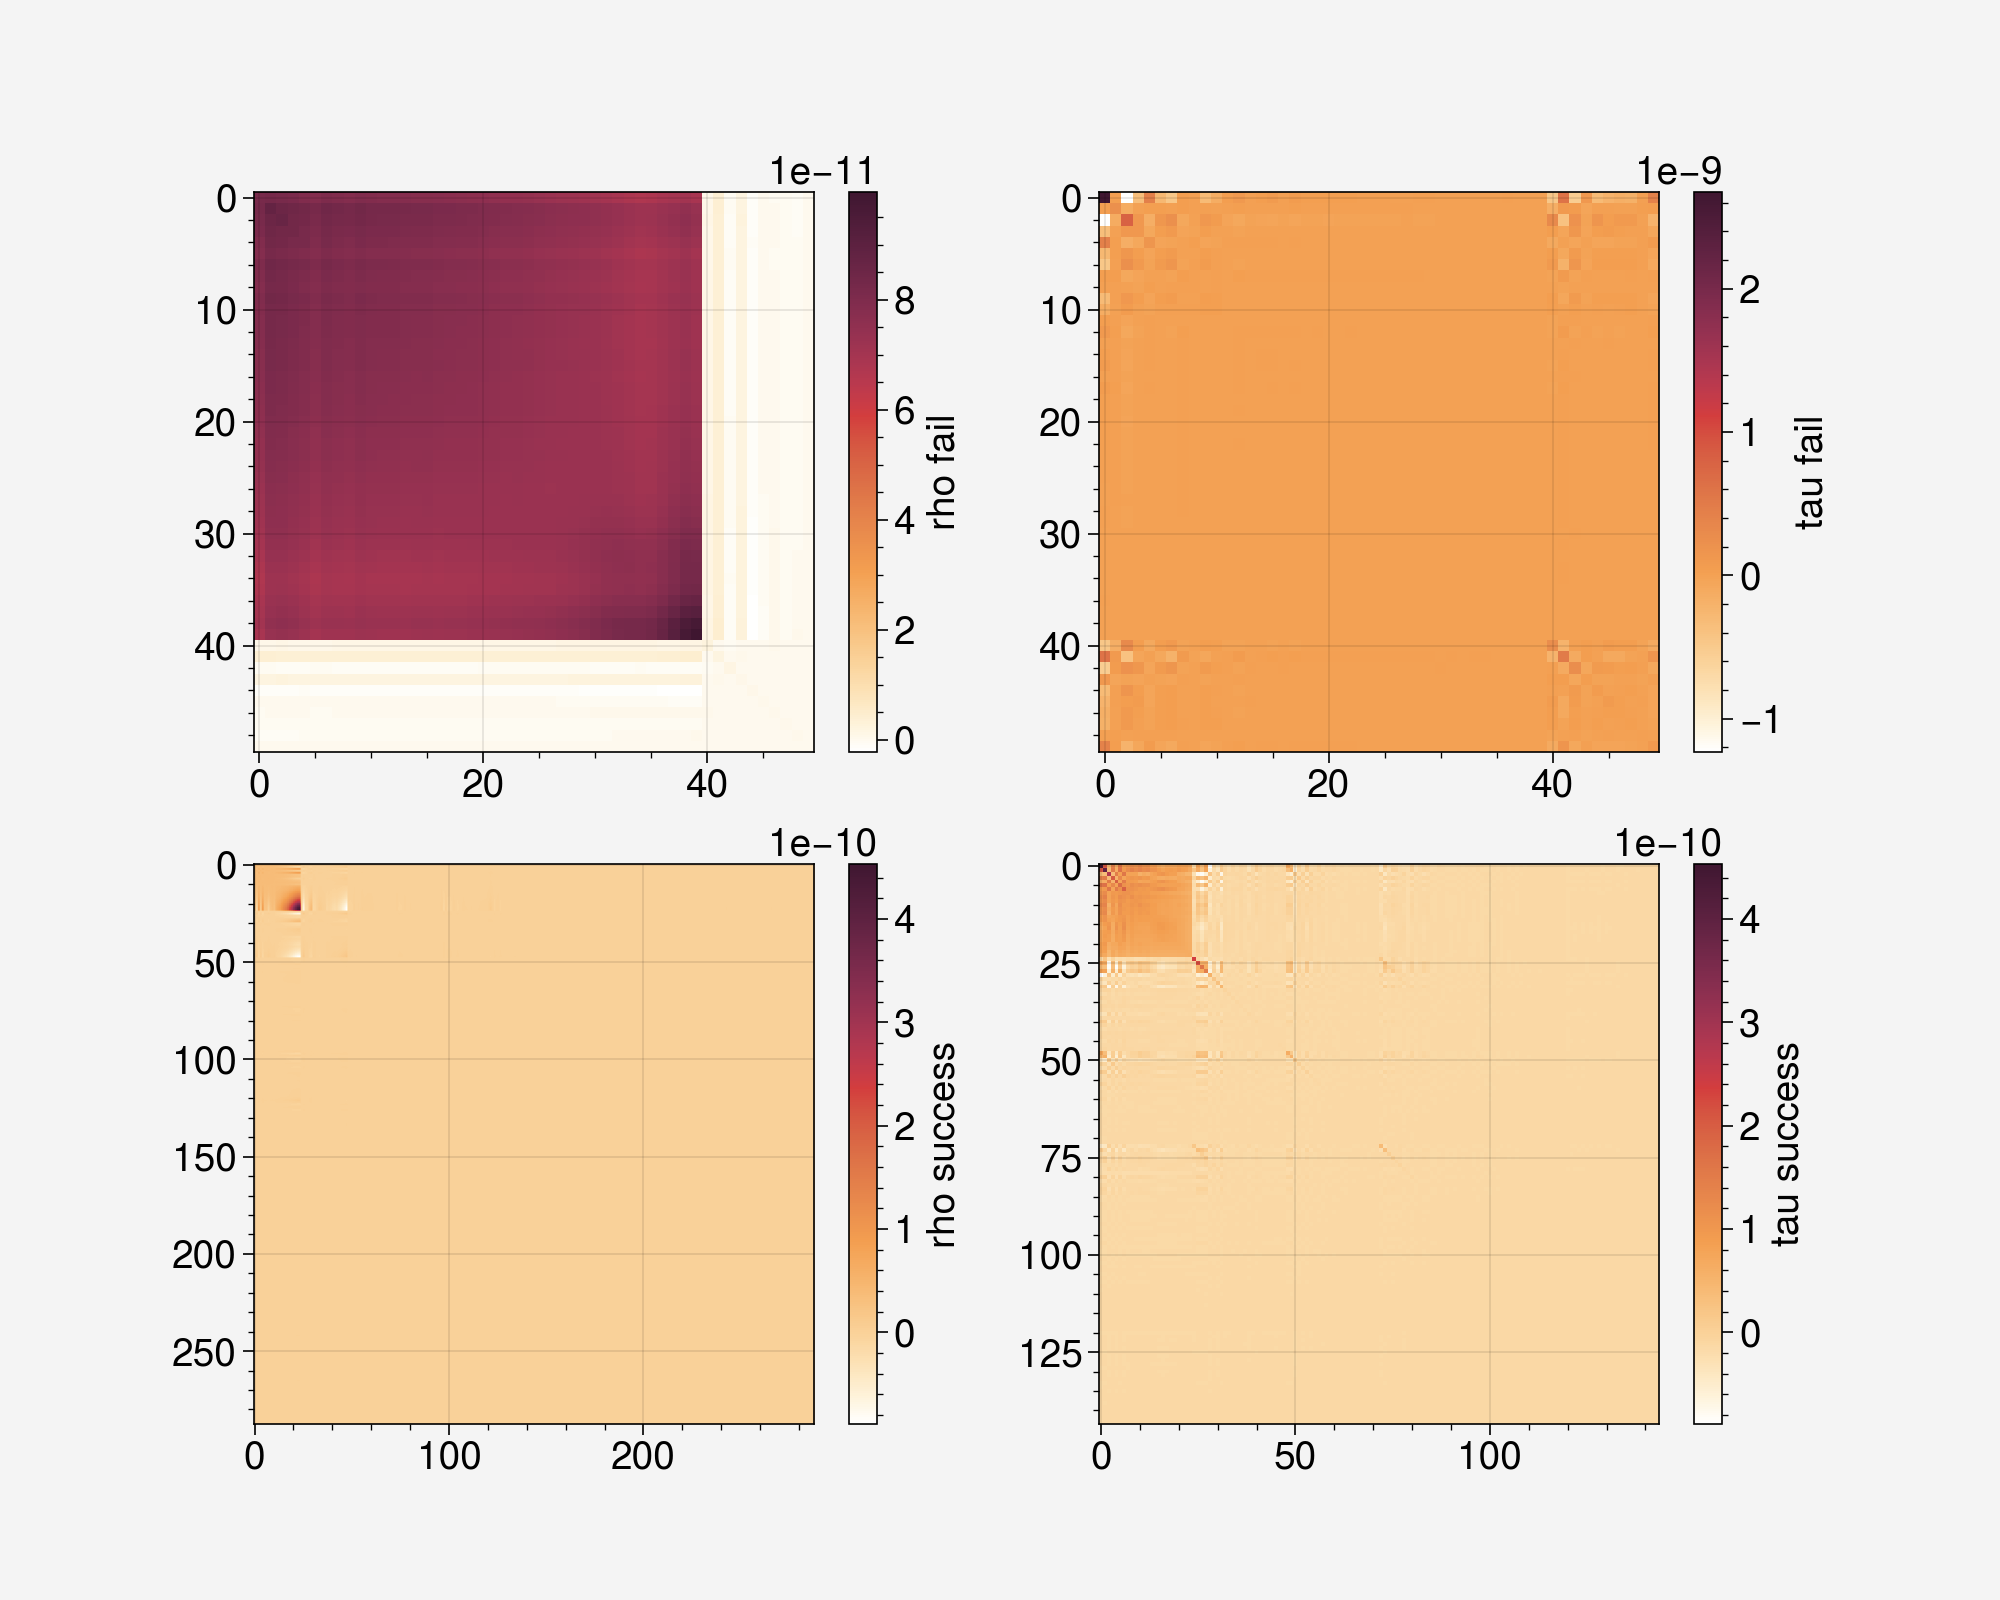

In [9]:
fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
im = ax[0,0].imshow(rho1[:50, :50])
fig.colorbar(im, ax=ax[0,0], label="rho fail")
im = ax[0,1].imshow(tau1[:50, :50])
fig.colorbar(im, ax=ax[0,1], label="tau fail")
im = ax[1,0].imshow(rho2)
fig.colorbar(im, ax=ax[1,0], label="rho success")
ax[1,1].imshow(tau2)
im = fig.colorbar(im, ax=ax[1,1], label="tau success")

In [16]:
rho1[150,150]

8.806314607418226e-17

In [17]:
rho2[150,150]

1.0928254231744812e-20

# Check inverse cov matrix

In [27]:
import fitsio as fio
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

outpath = '/pscratch/sd/m/myamamot/des-y6-analysis/y6_measurement/v3/rho_tau_stats/'
outpath2 = '/pscratch/sd/m/myamamot/metadetect/abe_test/'
stat_file = outpath+ 'tau_BOOT_Y6_nontomographic.fits'
covmat =  fio.read(stat_file, ext=1)
cov_inv = np.linalg.pinv(covmat, rcond=1e-11)

<ipython-input-31-4d62f12991a4>:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.imshow(covmat, norm=LogNorm(), vmax=1e-9)


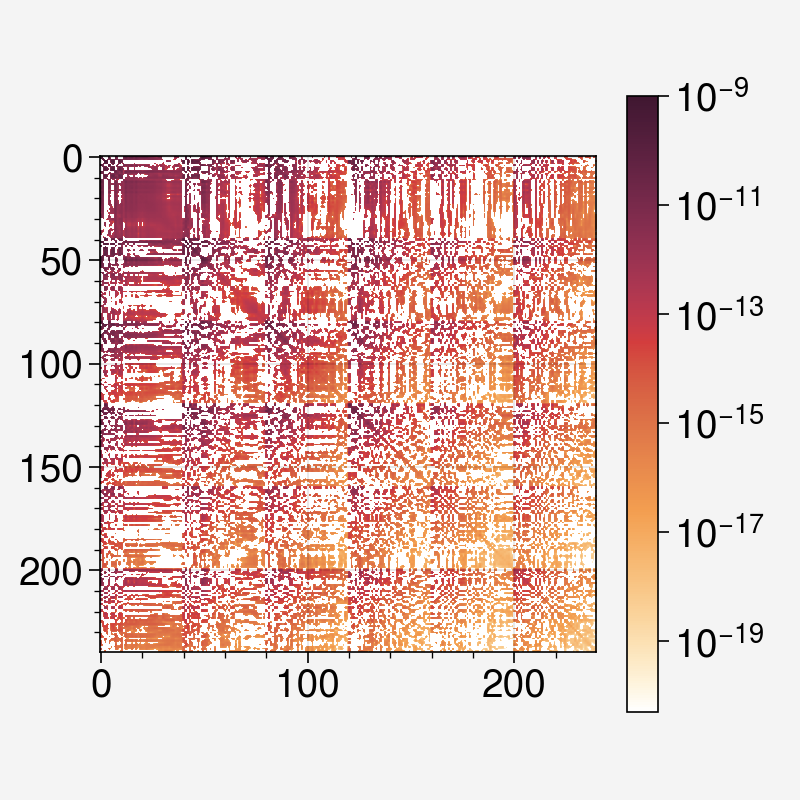

In [31]:
fig,ax=plt.subplots()
im = ax.imshow(covmat, norm=LogNorm(), vmax=1e-9)
fig.colorbar(im, ax=ax,)

# Minimization process check

In [32]:
def chi2(modelvec, datavec,  covmodel, covdata,  moderr=False ):
    d =  np.array([modelvec - datavec])
    cov_inv = np.linalg.pinv(covdata, rcond=1e-20)
    chisq = np.dot(np.dot(d,cov_inv), d.T) # d.T @ cov_inv @ d 
    return chisq[0][0]
def CHI2(pars, data):
    taus = data['taus']
    tau0p, tau0m, tau2p, tau2m, tau5p, tau5m =  taus
    rhos = data['rhos']
    rho0p, rho0m, rho1p, rho1m, rho2p, rho2m, rho3p, rho3m, rho4p, rho4m, rho5p, rho5m =  rhos
    cov_taus = data['cov_taus']
    cov_rhos = data['cov_rhos']
    dvect =  np.concatenate([tau0p, tau0m, tau2p, tau2m, tau5p, tau5m])  
    dcov_mat = cov_taus
    alpha, beta, eta = pars
    mvec0p = alpha*rho0p + beta*rho2p + eta*rho5p
    mvec1p = alpha*rho2p + beta*rho1p + eta*rho4p 
    mvec2p = alpha*rho5p + beta*rho4p + eta*rho3p
    mvec0m = alpha*rho0m + beta*rho2m + eta*rho5m
    mvec1m = alpha*rho2m + beta*rho1m + eta*rho4m 
    mvec2m = alpha*rho5m + beta*rho4m + eta*rho3m
    mvect =  np.concatenate([mvec0p, mvec0m, mvec1p, mvec1m, mvec2p, mvec2m])  
    mcov_mat = cov_rhos
    val=chi2(mvect, dvect, mcov_mat, dcov_mat, moderr=moderr )
    return val

In [33]:
import fitsio 
import numpy as np
stat_file = '/pscratch/sd/m/myamamot/metadetect/abe_test/rho_JK_v3_Y6_nontomographic.fits'
covmat=  fitsio.read(stat_file, ext=1)
RHO0P =  fitsio.read(stat_file, ext=2); rho0p =  RHO0P['VALUE']
RHO0M =  fitsio.read(stat_file, ext=3); rho0m =  RHO0M['VALUE']
RHO1P =  fitsio.read(stat_file, ext=4); rho1p =  RHO1P['VALUE']
RHO1M =  fitsio.read(stat_file, ext=5); rho1m =  RHO1M['VALUE']
RHO2P =  fitsio.read(stat_file, ext=6); rho2p =  RHO2P['VALUE']
RHO2M =  fitsio.read(stat_file, ext=7); rho2m =  RHO2M['VALUE']
RHO3P =  fitsio.read(stat_file, ext=8); rho3p =  RHO3P['VALUE']
RHO3M =  fitsio.read(stat_file, ext=9); rho3m =  RHO3M['VALUE']
RHO4P =  fitsio.read(stat_file, ext=10); rho4p =  RHO4P['VALUE']
RHO4M =  fitsio.read(stat_file, ext=11); rho4m =  RHO4M['VALUE']
RHO5P =  fitsio.read(stat_file, ext=12); rho5p =  RHO5P['VALUE']
RHO5M =  fitsio.read(stat_file, ext=13); rho5m =  RHO5M['VALUE']
meanr = RHO0P['ANG']
rhos = [rho0p, rho0m, rho1p, rho1m, rho2p, rho2m, rho3p, rho3m,rho4p, rho4m, rho5p, rho5m]
nrhos = len(rhos)
data = {}
data['rhos'] = rhos
data['cov_rhos'] = covmat

stat_file = '/pscratch/sd/m/myamamot/metadetect/abe_test/tau_JK_v3_Y6_nontomographic.fits'
covmat =  fitsio.read(stat_file, ext=1)
TAU0P =  fitsio.read(stat_file, ext=2); tau0p =  TAU0P['VALUE']
TAU0M =  fitsio.read(stat_file, ext=3); tau0m =  TAU0M['VALUE']
TAU2P =  fitsio.read(stat_file, ext=4); tau2p =  TAU2P['VALUE']
TAU2M =  fitsio.read(stat_file, ext=5); tau2m =  TAU2M['VALUE']
TAU5P =  fitsio.read(stat_file, ext=6); tau5p =  TAU5P['VALUE']
TAU5M =  fitsio.read(stat_file, ext=7); tau5m =  TAU5M['VALUE']

meanr = TAU0P['ANG']
taus = [tau0p, tau0m, tau2p, tau2m, tau5p, tau5m]
ntaus = len(taus)
data['taus'] = taus
data['cov_taus'] = covmat

mflags = [True, True, True]
eq = 4
xip = True
xim = True
moderr = False
i_guess0 = [ 0, 1, -1 ] #fiducial values
i_guess = np.array(i_guess0)[np.array(mflags)].tolist()
import scipy.optimize as optimize

result = optimize.minimize(CHI2, i_guess, args=(data), method='Nelder-Mead', tol=1e-8)

In [34]:
result

 final_simplex: (array([[0.02180776, 0.72250328, 8.77301605],
       [0.02180776, 0.72250328, 8.77301605],
       [0.02180776, 0.72250328, 8.77301604],
       [0.02180776, 0.72250328, 8.77301604]]), array([932.04821923, 932.04821923, 932.04821923, 932.04821923]))
           fun: 932.0482192277357
       message: 'Optimization terminated successfully.'
          nfev: 298
           nit: 141
        status: 0
       success: True
             x: array([0.02180776, 0.72250328, 8.77301605])